# I'm learning  NLTK + Stanford NLP package

---

## Pattern matching of a sentence:

#### Regular Expression

e.g. a sentence: "the cat barked or swam" can be matched via the Regular Expression:

((the|a)(cat|dog|fish))(barked|slept|swam)((and|or)(barked|slept|swam))*

In [124]:
alist=[7,1,3,4,5]
print(min(alist))

1


In [114]:
import re

In [122]:
string="One person found xxx helpful"
if ("One" in string):
    print(True)
else:
    print(False)

False


In [87]:
pattern="((the|a) (cat|dog|fish)) (barked|slept|swam) ((and|or) (barked|slept|swam))*"

m=re.match(pattern, "the cat barked or swam")

print m.groups()
print m.group(),"\n"

print m.span()
print m.start()

print m.end(),"\n"
print m.group()[0],"\n",m.group()[21],"\n",m.group()[0:22]

('the cat', 'the', 'cat', 'barked', 'or swam', 'or', 'swam')
the cat barked or swam 

(0, 22)
0
22 

t 
m 
the cat barked or swam


---

Another way to match a sentence is to construct a regular grammar:

#### Regular Grammar

(S the (S1 cat (VP barked (VP1 (C or) (VP swam)))))


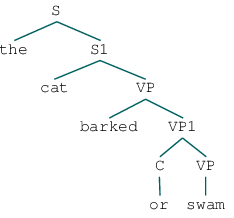

In [40]:
from IPython.core.display import display

grammar = nltk.CFG.fromstring("""
S -> 'the' S1
S1 -> 'cat' VP
VP -> 'barked' VP1
VP1 ->  C VP
C  -> 'or' | 'and'
VP -> 'swam'
""")

sent = ['the', 'cat', 'barked', 'or', 'swam']
parser = nltk.ChartParser(grammar)
for tree in parser.parse(sent):
    print tree
    display(tree)

Now, here is a sentence which shows ambiguity since it can be parsed into two different trees.

(http://www.nltk.org/book/ch08.html)

>A well-known example of ambiguity is shown in (2), from the Groucho Marx movie, Animal Crackers (1930):

>(2)		While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know.

>This grammar permits the sentence to be analyzed in two ways, depending on whether the prepositional phrase in my pajamas describes the elephant or the shooting event.

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


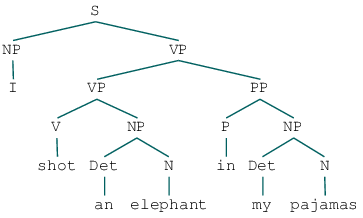

(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


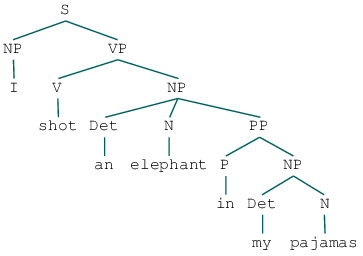

In [27]:
from IPython.core.display import display

groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print tree
    display(tree)

---

## Stanford NLP + Python NLTK

Stanford NLP
* http://nlp.stanford.edu/software/

Installation guides
* https://github.com/nltk/nltk/wiki/Installing-Third-Party-Software
* http://www.cnblogs.com/baiboy/p/nltk1.html

#### I. 分詞

In [2]:
import nltk
import os

# 提供環境變數
os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/jdk1.8.0_25.jdk/Contents/Home" 
os.environ["CLASSPATH"] = "/Users/chweng/Desktop/StanfordNLP/jars"
os.environ["STANFORD_MODELS"] = "/Users/chweng/Desktop/StanfordNLP/models"

from nltk.tokenize import StanfordTokenizer

tokenizer = StanfordTokenizer()
sent = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\nThanks."
print(tokenizer.tokenize(sent))

['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']


#### II. 命名實體識別

In [9]:
import nltk
import os

os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/jdk1.8.0_25.jdk/Contents/Home" 
os.environ["CLASSPATH"] = "/Users/chweng/Desktop/StanfordNLP/jars"
os.environ["STANFORD_MODELS"] = "/Users/chweng/Desktop/StanfordNLP/models"

from nltk.tag import StanfordNERTagger
eng_tagger = StanfordNERTagger(model_filename=r'english.all.3class.distsim.crf.ser.gz')
print(eng_tagger.tag(['New York',]))
print(eng_tagger.tag('Rami Eid is studying at Stony Brook University in New York'.split()))

[('New', 'LOCATION')]
[('Rami', 'PERSON'), ('Eid', 'PERSON'), ('is', 'O'), ('studying', 'O'), ('at', 'O'), ('Stony', 'ORGANIZATION'), ('Brook', 'ORGANIZATION'), ('University', 'ORGANIZATION'), ('in', 'O'), ('New', 'LOCATION'), ('York', 'LOCATION')]


#### III. 詞性標註

In [11]:
from nltk.tag import StanfordPOSTagger

os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/jdk1.8.0_25.jdk/Contents/Home" 
os.environ["CLASSPATH"] = "/Users/chweng/Desktop/StanfordNLP/jars"
os.environ["STANFORD_MODELS"] = "/Users/chweng/Desktop/StanfordNLP/models"

eng_tagger = StanfordPOSTagger(model_filename=r'english-bidirectional-distsim.tagger')
print(eng_tagger.tag('What is the airspeed of an unladen swallow ?'.split()))

[('What', 'WP'), ('is', 'VBZ'), ('the', 'DT'), ('airspeed', 'NN'), ('of', 'IN'), ('an', 'DT'), ('unladen', 'JJ'), ('swallow', 'VB'), ('?', '.')]


#### IV. 語法解析

(ROOT
  (NP
    (NP (DT the) (JJ quick) (JJ brown) (NN fox))
    (NP
      (NP (NNS jumps))
      (PP (IN over) (NP (DT the) (JJ lazy) (NN dog))))))


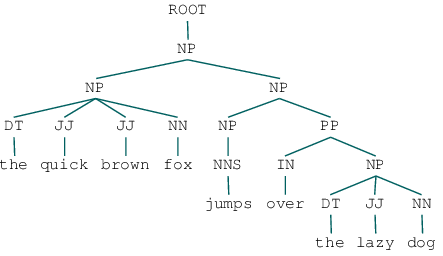

In [16]:
from nltk.parse.stanford import StanfordParser
from IPython.core.display import display

os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/jdk1.8.0_25.jdk/Contents/Home" 
os.environ["CLASSPATH"] = "/Users/chweng/Desktop/StanfordNLP/jars"
os.environ["STANFORD_MODELS"] = "/Users/chweng/Desktop/StanfordNLP/models"

eng_parser = StanfordParser()
structure=eng_parser.parse("the quick brown fox jumps over the lazy dog".split())

for tree in structure:
    print(tree)
    display(tree)

#print(list(eng_parser.parse("the quick brown fox jumps over the lazy dog".split())))

#### V. 依存語法解析

In [17]:
from nltk.parse.stanford import StanfordDependencyParser

os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/jdk1.8.0_25.jdk/Contents/Home" 
os.environ["CLASSPATH"] = "/Users/chweng/Desktop/StanfordNLP/jars"
os.environ["STANFORD_MODELS"] = "/Users/chweng/Desktop/StanfordNLP/models"

eng_parser = StanfordDependencyParser()
res = list(eng_parser.parse("the quick brown fox jumps over the lazy dog".split()))
for row in res[0].triples():
    print(row)

(('fox', 'NN'), 'det', ('the', 'DT'))
(('fox', 'NN'), 'amod', ('quick', 'JJ'))
(('fox', 'NN'), 'amod', ('brown', 'JJ'))
(('fox', 'NN'), 'dep', ('jumps', 'NNS'))
(('jumps', 'NNS'), 'nmod', ('dog', 'NN'))
(('dog', 'NN'), 'case', ('over', 'IN'))
(('dog', 'NN'), 'det', ('the', 'DT'))
(('dog', 'NN'), 'amod', ('lazy', 'JJ'))


---

## 稍微了解一下Stanford NLP套件後，我們再回到Python NLTK：

http://www.cnblogs.com/baiboy/p/nltk4.html

In [82]:
import nltk
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


#### 先以 gutenberg語料庫中的 Leaves of Grass by Walt Whitman為例。接下來的一些範例可以讓我們了解以下四個方法的意義：
* nltk.corpus.gutenberg.fileids()
* nltk.corpus.gutenberg.raw()
* nltk.corpus.gutenberg.sents()
* nltk.corpus.gutenberg.words()

In [56]:
print(nltk.corpus.gutenberg.raw("whitman-leaves.txt")[:500])

[Leaves of Grass by Walt Whitman 1855]


Come, said my soul,
Such verses for my Body let us write, (for we are one,)
That should I after return,
Or, long, long hence, in other spheres,
There to some group of mates the chants resuming,
(Tallying Earth's soil, trees, winds, tumultuous waves,)
Ever with pleas'd smile I may keep on,
Ever and ever yet the verses owning--as, first, I here and now
Signing for Soul and Body, set to them my name,

Walt Whitman



[BOOK I.  INSCRIPTIONS]

}  One's-Self I 


#### 印出該文前100字

In [71]:
print(nltk.corpus.gutenberg.words("whitman-leaves.txt")[:100])

['[', 'Leaves', 'of', 'Grass', 'by', 'Walt', 'Whitman', '1855', ']', 'Come', ',', 'said', 'my', 'soul', ',', 'Such', 'verses', 'for', 'my', 'Body', 'let', 'us', 'write', ',', '(', 'for', 'we', 'are', 'one', ',)', 'That', 'should', 'I', 'after', 'return', ',', 'Or', ',', 'long', ',', 'long', 'hence', ',', 'in', 'other', 'spheres', ',', 'There', 'to', 'some', 'group', 'of', 'mates', 'the', 'chants', 'resuming', ',', '(', 'Tallying', 'Earth', "'", 's', 'soil', ',', 'trees', ',', 'winds', ',', 'tumultuous', 'waves', ',)', 'Ever', 'with', 'pleas', "'", 'd', 'smile', 'I', 'may', 'keep', 'on', ',', 'Ever', 'and', 'ever', 'yet', 'the', 'verses', 'owning', '--', 'as', ',', 'first', ',', 'I', 'here', 'and', 'now', 'Signing', 'for']


#### 印出該文前兩句

In [67]:
for j in range(2):
    print( nltk.corpus.gutenberg.sents("whitman-leaves.txt")[j])

['[', 'Leaves', 'of', 'Grass', 'by', 'Walt', 'Whitman', '1855', ']']
['Come', ',', 'said', 'my', 'soul', ',', 'Such', 'verses', 'for', 'my', 'Body', 'let', 'us', 'write', ',', '(', 'for', 'we', 'are', 'one', ',)', 'That', 'should', 'I', 'after', 'return', ',', 'Or', ',', 'long', ',', 'long', 'hence', ',', 'in', 'other', 'spheres', ',', 'There', 'to', 'some', 'group', 'of', 'mates', 'the', 'chants', 'resuming', ',', '(', 'Tallying', 'Earth', "'", 's', 'soil', ',', 'trees', ',', 'winds', ',', 'tumultuous', 'waves', ',)', 'Ever', 'with', 'pleas', "'", 'd', 'smile', 'I', 'may', 'keep', 'on', ',', 'Ever', 'and', 'ever', 'yet', 'the', 'verses', 'owning', '--', 'as', ',', 'first', ',', 'I', 'here', 'and', 'now', 'Signing', 'for', 'Soul', 'and', 'Body', ',', 'set', 'to', 'them', 'my', 'name', ',']


#### 印出文本尺寸，文本總字數，平均詞長，句長等

In [45]:
num_char = len(nltk.corpus.gutenberg.raw("whitman-leaves.txt"))    # 原始文本的长度，包括空格、符号等
num_words = len(nltk.corpus.gutenberg.words("whitman-leaves.txt")) # 词的数量
num_sents = len(nltk.corpus.gutenberg.sents("whitman-leaves.txt")) # 句子的数量
num_vocab = len(set([w.lower() for w in nltk.corpus.gutenberg.words("whitman-leaves.txt")])) #文本的尺寸

# 印出文本尺寸，以及文本總字數
print(len(set([w.lower() for w in nltk.corpus.gutenberg.words("whitman-leaves.txt")])),len([w.lower() for w in nltk.corpus.gutenberg.words("whitman-leaves.txt")]))

# 印出平均詞長（包括一个空白符号）、平均句子長度、和文本中每个詞出现的平均次数
print(int(num_char/num_words),int(num_words/num_sents),int(num_words/num_vocab),"whitman-leaves.txt")

12452 154883
4 36 12 whitman-leaves.txt


#### nltk.FreqDist() can be used to calculate the frequency of words showing in the text.

In [84]:
import nltk
from nltk.corpus import brown

print(brown.categories())

new_texts=brown.words(categories='news')
print(brown.raw(categories='news')[:300]+"\n")
wfreq=nltk.FreqDist([w.lower() for w in new_texts])
modals=['can','could','may','might','must','will']
for m in modals:
    print(m + ':',wfreq[m])

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


	The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.


	The/at jury/nn further/rbr said/vbd in/in t

can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


In [50]:
len([w.lower() for w in new_texts])

100554

#### the method {str}.startswith()

In [92]:
a='123 as2'
print(a.startswith('123 111'))
print(a.startswith('123 a'))

False
True


In [95]:
print(inaugural.words("1793-Washington.txt")[:200])

['Fellow', 'citizens', ',', 'I', 'am', 'again', 'called', 'upon', 'by', 'the', 'voice', 'of', 'my', 'country', 'to', 'execute', 'the', 'functions', 'of', 'its', 'Chief', 'Magistrate', '.', 'When', 'the', 'occasion', 'proper', 'for', 'it', 'shall', 'arrive', ',', 'I', 'shall', 'endeavor', 'to', 'express', 'the', 'high', 'sense', 'I', 'entertain', 'of', 'this', 'distinguished', 'honor', ',', 'and', 'of', 'the', 'confidence', 'which', 'has', 'been', 'reposed', 'in', 'me', 'by', 'the', 'people', 'of', 'united', 'America', '.', 'Previous', 'to', 'the', 'execution', 'of', 'any', 'official', 'act', 'of', 'the', 'President', 'the', 'Constitution', 'requires', 'an', 'oath', 'of', 'office', '.', 'This', 'oath', 'I', 'am', 'now', 'about', 'to', 'take', ',', 'and', 'in', 'your', 'presence', ':', 'That', 'if', 'it', 'shall', 'be', 'found', 'during', 'my', 'administration', 'of', 'the', 'Government', 'I', 'have', 'in', 'any', 'instance', 'violated', 'willingly', 'or', 'knowingly', 'the', 'injunction

#### use the method nltk.ConditionalFreqDist() to calculate the conditional freq. distribution:

here's a built-in corpus which records the inaugural speeches of presidents of the U.S.

56
['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Re

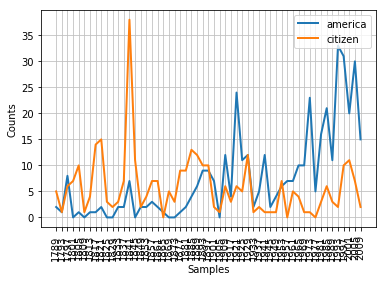

        1789 1793 1797 1801 1805 1809 1813 1817 1821 1825 1829 1833 1837 1841 1845 1849 1853 1857 1861 1865 1869 1873 1877 1881 1885 1889 1893 1897 1901 1905 1909 1917 1921 1925 1929 1933 1937 1941 1945 1949 1953 1957 1961 1965 1969 1973 1977 1981 1985 1989 1993 1997 2001 2005 2009 
america    2    1    8    0    1    0    1    1    2    0    0    2    2    7    0    2    2    3    2    1    0    0    1    2    4    6    9    9    7    0   12    4   24   11   12    2    5   12    2    4    6    7    7   10   10   23    5   16   21   11   33   31   20   30   15 
citizen    5    1    6    7   10    1    4   14   15    3    2    3    7   38   11    2    4    7    7    0    5    3    9    9   13   12   10   10    2    1    6    3    6    5   12    1    2    1    1    1    7    0    5    4    1    1    0    3    6    3    2   10   11    7    2 


In [105]:
from nltk.corpus import inaugural

print(len(inaugural.fileids()))
print([fileid for fileid in inaugural.fileids()])

import nltk
cfd=nltk.ConditionalFreqDist((target,fileid[:4]) for fileid in inaugural.fileids() for w in inaugural.words(fileid) for target in ['america','citizen'] if w.lower().startswith(target))
cfd.plot()
cfd.tabulate()

In [113]:
[(w.lower()) for fileid in inaugural.fileids() for w in inaugural.words(fileid) for target in ['america','citizen'] if w.lower().startswith(target)][:20]

['citizens',
 'citizens',
 'citizens',
 'citizens',
 'citizens',
 'american',
 'american',
 'citizens',
 'america',
 'america',
 'america',
 'citizens',
 'citizens',
 'american',
 'america',
 'citizen',
 'citizens',
 'america',
 'citizens',
 'america']

#### yet another example of the use of the method nltk.ConditionalFreqDist()

from http://www.nltk.org/_modules/nltk/probability.html

['the', 'the', 'the', 'dog', 'dog', 'some', 'other', 'words', 'that', 'we', 'do', 'not', 'care', 'about']


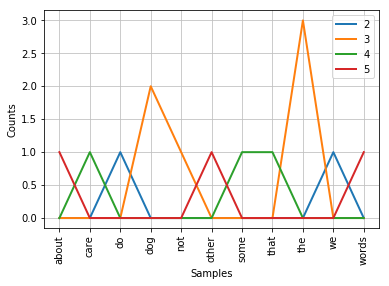

  about  care    do   dog   not other  some  that   the    we words 
2     0     0     1     0     0     0     0     0     0     1     0 
3     0     0     0     2     1     0     0     0     3     0     0 
4     0     1     0     0     0     0     1     1     0     0     0 
5     1     0     0     0     0     1     0     0     0     0     1 
None


In [104]:
import nltk
from nltk.tokenize import word_tokenize

sent = "the the the dog dog some other words that we do not care about"
print(word_tokenize(sent))
cfdist = nltk.ConditionalFreqDist((len(word), word) for word in word_tokenize(sent))
cfdist.plot()
print(cfdist.tabulate())

---